In [30]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from tqdm.auto import tqdm
from IPython.display import Video, HTML
from jupyter_innotater import Innotater, ImageInnotation, BoundingBoxInnotation, RepeatInnotation, TextInnotation


In [41]:
import json
with open('../data/mouse_video/annotation.json', 'r') as f:
    annot = json.load(f)
video_paths = [(a['video_path'], a['cage']) for a in annot]

# convert all files to MP4

In [48]:
import subprocess
root = '../data/mouse_video/short_vid/'
for fn in os.listdir(root):
    tgfn = fn.split('.')[0] + '.mp4'
    if not os.path.exists(os.path.join(root, tgfn)):
        pcs = subprocess.run(
            ["ffmpeg", "-loglevel", "panic", "-i", os.path.join(root, fn), os.path.join(root, tgfn)],
            capture_output=True, check=True)
        print(pcs.args, pcs.stdout)

['ffmpeg', '-loglevel', 'panic', '-i', '../data/mouse_video/short_vid/20190814-B1.avi', '../data/mouse_video/short_vid/20190814-B1.mp4'] b''
['ffmpeg', '-loglevel', 'panic', '-i', '../data/mouse_video/short_vid/IMG 0675.wmv', '../data/mouse_video/short_vid/IMG 0675.mp4'] b''
['ffmpeg', '-loglevel', 'panic', '-i', '../data/mouse_video/short_vid/20190821.wmv', '../data/mouse_video/short_vid/20190821.mp4'] b''
['ffmpeg', '-loglevel', 'panic', '-i', '../data/mouse_video/short_vid/20190726.wmv', '../data/mouse_video/short_vid/20190726.mp4'] b''
['ffmpeg', '-loglevel', 'panic', '-i', '../data/mouse_video/short_vid/20190725.wmv', '../data/mouse_video/short_vid/20190725.mp4'] b''
['ffmpeg', '-loglevel', 'panic', '-i', '../data/mouse_video/short_vid/20190904.wmv', '../data/mouse_video/short_vid/20190904.mp4'] b''
['ffmpeg', '-loglevel', 'panic', '-i', '../data/mouse_video/short_vid/20190807.wmv', '../data/mouse_video/short_vid/20190807.mp4'] b''
['ffmpeg', '-loglevel', 'panic', '-i', '../data/m

In [21]:
xlsx_notations = """00:03~00:15
06:06~06:10
08:02~08:10
"""
def tosec(inp):
    min, sec = inp.split(':')
    return int(min) * 60 + int(sec)
for sample in xlsx_notations.strip().split('\n'):
    st, ed = sample.split('~')
    print([tosec(st), tosec(ed)], end=', ')
    

[3, 15], [366, 370], [482, 490],

[('data/mouse_video/short_vid/20190807.mp4', 0), (155, 508, 464, 448)]


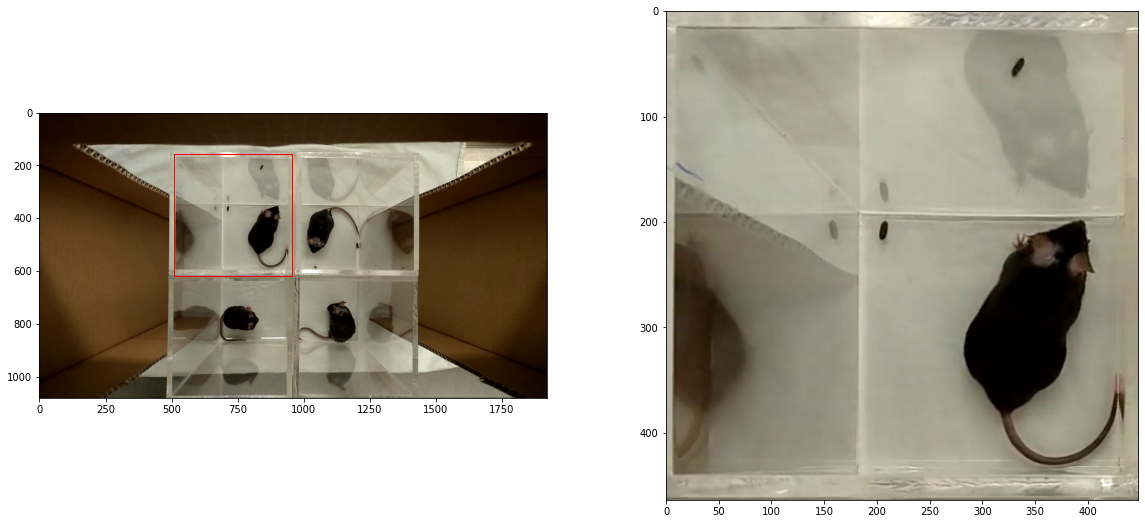

In [64]:
vid_path = video_paths[34]
cage = (210, 489, 352, 347)  # (x, y, w, h)
cage = (cage[1], cage[0], cage[3], cage[2])# (y, x, h, w)
cage = (155, 508, 464, 448)
# vid_path, cage = crop_info[8]
frame_idx, now = 600, 0
print([vid_path, cage])
cap = cv2.VideoCapture(f'../{vid_path[0]}')
plt.figure(figsize=(20, 9))

cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
if cap.isOpened():
    ret, frame = cap.read()
#     frame = frame[cage[0]:cage[0]+cage[2], cage[1]:cage[1]+cage[3]]
    new_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # print(cap.get(cv2.CAP_PROP_FPS))
    ax = plt.subplot(1, 2, 1)
    plt.imshow(new_frame)
    ax.add_patch(patches.Rectangle(cage[:2][::-1], cage[3], cage[2],linewidth=1,edgecolor='r',facecolor='none'))

    frame = frame[cage[0]:cage[0]+cage[2], cage[1]:cage[1]+cage[3]]
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 2)
    plt.imshow(frame)
    plt.show()
cap.release()

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         if now > 0:
#             print("??")
#             break
#         continue
#     if now == frame_idx:
#         ax = plt.subplot(1, 2, 1)
#         new_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         plt.imshow(new_frame)
#         ax.add_patch(patches.Rectangle(cage[:2][::-1], cage[3], cage[2],linewidth=1,edgecolor='r',facecolor='none'))

#         plt.subplot(1, 2, 2)
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         plt.imshow(frame[cage[0]:cage[0]+cage[2], cage[1]:cage[1]+cage[3]])
#         plt.show()
#         break
#     now += 1
# cap.release()

In [52]:
def read_video_frame(path, indices):
    if isinstance(indices, int):
        indices = [indices]
    ret = []
    cap = cv2.VideoCapture(path)
    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        if cap.isOpened():
            _, frame = cap.read()
            ret.append(frame)
    cap.release()
    return ret


In [59]:
vid_paths = [p for p, _ in video_paths][34:]
cages = [f"{p} cage {c}" for p, c in video_paths][34:]
# target = np.zeros((len(vid_paths), 4))
frame_idx = 600

Innotater(
    [ImageInnotation([read_video_frame(f'../{p}', frame_idx)[0] for p in tqdm(vid_paths)], height=400), TextInnotation(cages)],
    [BoundingBoxInnotation(target)],
)


Innotater(children=(HBox(children=(VBox(children=(ImagePad(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00…

In [63]:
for (p, c), cage in zip(video_paths[34:], target[:, [1,0,3,2]]):
    print([(p, c), tuple(cage.astype(int).tolist())])

[('data/mouse_video/short_vid/20190807.mp4', 0), (155, 508, 464, 448)]
[('data/mouse_video/short_vid/20190807.mp4', 1), (622, 491, 458, 459)]
[('data/mouse_video/short_vid/20190807.mp4', 2), (155, 975, 462, 462)]
[('data/mouse_video/short_vid/20190807.mp4', 3), (625, 969, 448, 456)]
[('data/mouse_video/short_vid/20190814-B1.mp4', 0), (171, 84, 241, 265)]
[('data/mouse_video/short_vid/20190814-B1.mp4', 1), (191, 344, 220, 191)]
[('data/mouse_video/short_vid/20190814-B2.mp4', 0), (184, 83, 232, 266)]
[('data/mouse_video/short_vid/20190814-B2.mp4', 1), (189, 349, 220, 185)]
[('data/mouse_video/short_vid/20190820.mp4', 0), (179, 190, 198, 222)]
[('data/mouse_video/short_vid/20190820.mp4', 1), (183, 412, 188, 224)]
[('data/mouse_video/short_vid/20190821.mp4', 0), (194, 184, 190, 220)]
[('data/mouse_video/short_vid/20190821.mp4', 1), (191, 404, 197, 211)]
[('data/mouse_video/short_vid/20190904.mp4', 0), (363, 335, 570, 575)]
[('data/mouse_video/short_vid/20190904.mp4', 1), (360, 913, 564, 57

## choose 1
- ('data/mouse_video/20190814/V_20190814_134337_OC0.mp4', 0), (260, 340, 600, 600)
-- ('data/mouse_video/20190814/V_20190814_134337_OC0.mp4', 1), (300, 940, 600, 600)
## Size mismatch by time
- ('data/mouse_video/20190906/V_20190906_123023_OC0.mp4', 0), (0, 0, 1080, 850)
- ('data/mouse_video/20190906/V_20190906_123023_OC0.mp4', 1), (0, 850, 1080, 1070)

- ('data/mouse_video/20190917/V_20190917_124903_OC0.mp4', 0), (580, 1000, 500, 750)
- ('data/mouse_video/20190917/V_20190917_124903_OC0.mp4', 2), (540, 375, 540, 625)
- ('data/mouse_video/20190917/V_20190917_124903_OC0.mp4', 3), (0, 375, 540, 625)

- ('data/mouse_video/20190919/V_20190919_134212_OC0.mp4', 0), (450, 960, 580, 600)
- ('data/mouse_video/20190919/V_20190919_134212_OC0.mp4', 1), (0, 960, 450, 600)
- ('data/mouse_video/20190919/V_20190919_134212_OC0.mp4', 2), (450, 360, 580, 600)
- ('data/mouse_video/20190919/V_20190919_134212_OC0.mp4', 3), (0, 360, 500, 600)


In [65]:
crop_info = [
    # [('data/mouse_video/20190814/V_20190814_134337_OC0.mp4', 0), (260, 340, 600, 600)],

    # [('data/mouse_video/20190906/V_20190906_123023_OC0.mp4', 0), (0, 850, 1080, 1070)],
    # [('data/mouse_video/20190906/V_20190906_123023_OC0.mp4', 1), (0, 0, 1080, 850)],

    # [('data/mouse_video/20190917/V_20190917_124903_OC0.mp4', 0), (580, 1000, 500, 750)],
    # [('data/mouse_video/20190917/V_20190917_124903_OC0.mp4', 2), (540, 375, 540, 625)],
    # [('data/mouse_video/20190917/V_20190917_124903_OC0.mp4', 3), (0, 375, 540, 625)],

    # [('data/mouse_video/20190919/V_20190919_134212_OC0.mp4', 0), (450, 960, 580, 600)],
    # [('data/mouse_video/20190919/V_20190919_134212_OC0.mp4', 1), (0, 960, 450, 600)],
    # [('data/mouse_video/20190919/V_20190919_134212_OC0.mp4', 2), (450, 360, 580, 600)],
    # [('data/mouse_video/20190919/V_20190919_134212_OC0.mp4', 3), (0, 360, 500, 600)],

    # [('data/mouse_video/short_vid/20190606.mp4', 0), (500, 250, 300, 350)],
    # [('data/mouse_video/short_vid/20190606.mp4', 1), (500, 600, 300, 350)],
    # [('data/mouse_video/short_vid/20190606.mp4', 2), (500, 990, 300, 350)],
    # [('data/mouse_video/short_vid/20190606.mp4', 3), (500, 1340, 300, 350)],

    # [('data/mouse_video/short_vid/20190613.mp4', 0), (350, 100, 400, 450)],
    # [('data/mouse_video/short_vid/20190613.mp4', 1), (350, 550, 400, 450)],
    # [('data/mouse_video/short_vid/20190613.mp4', 2), (350, 1000, 400, 450)],
    # [('data/mouse_video/short_vid/20190613.mp4', 3), (350, 1350, 400, 550)],

    # [('data/mouse_video/short_vid/20190614.mp4', 0), (280, 150, 370, 450)],
    # [('data/mouse_video/short_vid/20190614.mp4', 1), (280, 550, 370, 350)],
    # [('data/mouse_video/short_vid/20190614.mp4', 2), (280, 900, 370, 350)],
    # [('data/mouse_video/short_vid/20190614.mp4', 3), (280, 1180, 370, 420)],
    
    # [('data/mouse_video/short_vid/20190725.mp4', 0), (530, 250, 350, 450)],
    # [('data/mouse_video/short_vid/20190725.mp4', 1), (530, 600, 350, 400)],
    # [('data/mouse_video/short_vid/20190725.mp4', 2), (530, 950, 350, 380)],
    # [('data/mouse_video/short_vid/20190725.mp4', 3), (530, 1330, 350, 350)],

    # [('data/mouse_video/short_vid/20190726.mp4', 0), (400, 0, 400, 500)],
    # [('data/mouse_video/short_vid/20190726.mp4', 1), (400, 450, 400, 450)],
    # [('data/mouse_video/short_vid/20190726.mp4', 2), (400, 920, 400, 450)],
    # [('data/mouse_video/short_vid/20190726.mp4', 3), (400, 1370, 400, 450)],

    # [('data/mouse_video/short_vid/20190730.mp4', 0), (500, 230, 350, 350)],
    # [('data/mouse_video/short_vid/20190730.mp4', 1), (500, 580, 350, 350)],
    # [('data/mouse_video/short_vid/20190730.mp4', 2), (500, 930, 350, 350)],
    # [('data/mouse_video/short_vid/20190730.mp4', 3), (500, 1250, 350, 370)],

    [('data/mouse_video/short_vid/20190807.mp4', 0), (155, 508, 464, 448)],
    [('data/mouse_video/short_vid/20190807.mp4', 1), (622, 491, 458, 459)],
    [('data/mouse_video/short_vid/20190807.mp4', 2), (155, 975, 462, 462)],
    [('data/mouse_video/short_vid/20190807.mp4', 3), (625, 969, 448, 456)],
    [('data/mouse_video/short_vid/20190814-B1.mp4', 0), (171, 84, 241, 265)],
    [('data/mouse_video/short_vid/20190814-B1.mp4', 1), (191, 344, 220, 191)],
    [('data/mouse_video/short_vid/20190814-B2.mp4', 0), (184, 83, 232, 266)],
    [('data/mouse_video/short_vid/20190814-B2.mp4', 1), (189, 349, 220, 185)],
    [('data/mouse_video/short_vid/20190820.mp4', 0), (179, 190, 198, 222)],
    [('data/mouse_video/short_vid/20190820.mp4', 1), (183, 412, 188, 224)],
    [('data/mouse_video/short_vid/20190821.mp4', 0), (194, 184, 190, 220)],
    [('data/mouse_video/short_vid/20190821.mp4', 1), (191, 404, 197, 211)],
    [('data/mouse_video/short_vid/20190904.mp4', 0), (363, 335, 570, 575)],
    [('data/mouse_video/short_vid/20190904.mp4', 1), (360, 913, 564, 578)],

]

In [66]:
for (vid_path, cage), cage_pos in tqdm(crop_info):
    vid_path = f'../{vid_path}'
    # (vid_path, cage), cage_pos = ('../data/mouse_video/20190919/V_20190919_134212_OC0.mp4', 3), (0, 360, 500, 600)
    new_name = os.path.join(os.path.dirname(vid_path), f'{os.path.basename(vid_path).split(".")[0]}_c{cage}.mp4')
    if os.path.exists(new_name):
        os.remove(path=new_name)
        print("removing", new_name)
    cap = cv2.VideoCapture(vid_path)
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
#     print("size", int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    # out = cv2.VideoWriter(new_name, int(cap.get(cv2.CAP_PROP_FOURCC)), cap.get(cv2.CAP_PROP_FPS), (cage_pos[3], cage_pos[2]))
    out = cv2.VideoWriter(new_name, fourcc, cap.get(cv2.CAP_PROP_FPS), (cage_pos[3], cage_pos[2]))

    total = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    # total = 1000

    pbar = tqdm(total=int(total), leave=False)
    while cap.isOpened():
        ret, frame = cap.read()
        pbar.update(1)
        if ret:
            frame = frame[cage_pos[0]:cage_pos[0]+cage_pos[2], cage_pos[1]:cage_pos[1]+cage_pos[3]]
            out.write(frame)
        else:
            break
    #     if pbar.n > total:
    #         break

    pbar.close()
    cap.release()
    out.release()

    if not os.path.exists(new_name):
        print("VideoWriter ERROR")


In [6]:
pbar.close()
cap.release()
out.release()


  7%|▋         | 4142/57528.0 [01:06<14:22, 61.90it/s]

In [12]:
%%bash -s "$new_name"
ffmpeg -i $1 -c:v libx264 test.mp4 -y

ffmpeg version 4.2.2-0york0~18.04 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.4.0-1ubuntu1~18.04.1)
  configuration: --prefix=/usr --extra-version='0york0~18.04' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorb

In [22]:
print(vid_path, os.path.exists(vid_path))
print(new_name, os.path.exists(new_name))

../data/mouse_video/20190919/V_20190919_134212_OC0.mp4 True
../data/mouse_video/20190919/V_20190919_134212_OC0_c3.mp4 True


In [47]:
%%bash -s "$vid_path"
du -sh $1

4.6G	../data/mouse_video/20190919/V_20190919_134212_OC0.mp4


In [14]:
Video(vid_path)